# Importing Python Modules & Setting Up Jupyter Notebook Settings

In [1]:
# The usual data visualization modules

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# This is to increase the size of all figures
plt.rcParams["figure.dpi"] = 150

In [2]:
# Other Python modules

import datetime as dt
import datetime
from datetime import datetime

from scipy import stats

In [3]:
# Used to execute multple lines of code in a single cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# # Used to display dataframes horizontally (instead of vertically)

# from IPython.display import display_html
# def display_side_by_side(*args):
#     html_str=''
#     for df in args:
#         html_str+=df.to_html()
#     display_html(html_str.replace('table','table style="display:inline"'),raw=True)

    
## ABOVE CODE IS NOT USED! Instead I used the solution here:
# https://stackoverflow.com/a/50899244
from IPython.display import display_html

In [5]:
# Modules to create interactive plots

import chart_studio.plotly as py
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

# Importing Raw Data Files

In [6]:
# Lightning strike data (in case it is needed)

ffx = pd.read_csv("ffxLighting_original_june28.txt")
ffx2 = pd.read_csv("ffxLighting_new_july1.txt")

In [23]:
# Importing grayscale data file
#### NOTE: This data is associated with the SECOND lightning strike data!

gray = pd.read_csv("gray_file_july1.txt")

**Initial Look At The Data**

In [24]:
gray

,grayscale,timings
0,235.556693,2020-07-01 22:18:21.991453
1,235.544079,2020-07-01 22:18:22.187393
2,229.834134,2020-07-01 22:18:22.202118
3,229.882272,2020-07-01 22:18:22.219390
4,229.889206,2020-07-01 22:18:22.234170
...,...,...
399534,127.633434,2020-07-02 02:44:34.593307
399535,127.033685,2020-07-02 02:44:34.625037
399536,126.286911,2020-07-02 02:44:34.661103
399537,131.466966,2020-07-02 02:44:34.693662


**General Info About Raw Data**

In [25]:
gray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399539 entries, 0 to 399538
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   grayscale  399539 non-null  float64
 1    timings   399539 non-null  object 
dtypes: float64(1), object(1)
memory usage: 6.1+ MB


In [26]:
gray.describe()

,grayscale
count,399539.000000
mean,137.480845
std,24.593026
min,21.499414
25%,129.019624
50%,133.231758
75%,139.700376
max,253.803958


In [27]:
gray.columns

Index(['grayscale', ' timings'], dtype='object')

**Looking At Specific Data Entries**

In [28]:
gray["grayscale"][0]
gray[" timings"][0]

235.55669270833332

' 2020-07-01 22:18:21.991453'

In [29]:
type(gray["grayscale"][0])
type(gray[" timings"][0])

numpy.float64

str

# **Data Cleaning**

To start, let's get rid of the space in the 'timings' column and data.

In [30]:
# Eliminate leading space in 'timings' column header

gray.rename(mapper={" timings": "timings"}, axis=1, inplace=True)
gray.columns

Index(['grayscale', 'timings'], dtype='object')

In [31]:
# Eliminate space in 'timings' data

gray["timings"] = gray["timings"].apply(lambda string: string[1:])
gray["timings"][0]

'2020-07-01 22:18:21.991453'

Next, we convert the timings data from string-type into Datetime-type.

In [32]:
# Convering timing data to Datetime objects

gray["Datetime"] = pd.to_datetime(gray["timings"])

# Verify to see if it worked correctly
gray.head()
gray["Datetime"][0]
type(gray["Datetime"][0])

,grayscale,timings,Datetime
0,235.556693,2020-07-01 22:18:21.991453,2020-07-01 22:18:21.991453
1,235.544079,2020-07-01 22:18:22.187393,2020-07-01 22:18:22.187393
2,229.834134,2020-07-01 22:18:22.202118,2020-07-01 22:18:22.202118
3,229.882272,2020-07-01 22:18:22.219390,2020-07-01 22:18:22.219390
4,229.889206,2020-07-01 22:18:22.234170,2020-07-01 22:18:22.234170


Timestamp('2020-07-01 22:18:21.991453')

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
# Check for null values

gray.count()
gray.isnull().count()

grayscale    399539
timings      399539
Datetime     399539
deltaT       399538
dtype: int64

grayscale    399539
timings      399539
Datetime     399539
deltaT       399539
dtype: int64

# Feature Engineering

**Create A 'Time Difference' Feature**

In [34]:
# Creating 'time difference' feature column

gray["deltaT"] = gray["Datetime"] - gray["Datetime"].shift(1)

In [36]:
# Extracting only 'seconds' from the time difference feature
#### NOTE: This may take a long time to run!

gray["dT(seconds)"] = [gray["deltaT"][i].seconds + gray["deltaT"][i].microseconds * 10**(-6) for i in range(0,len(gray["deltaT"]))]

In [43]:
# Just to verify everything done so far

gray.head()

gray['deltaT'][1]
gray['deltaT'][1].seconds
gray['deltaT'][1].microseconds

gray['dT(seconds)'][1]
type(gray['dT(seconds)'][1])

,grayscale,timings,Datetime,deltaT,dT(seconds)
0,235.556693,2020-07-01 22:18:21.991453,2020-07-01 22:18:21.991453,NaT,NaN
1,235.544079,2020-07-01 22:18:22.187393,2020-07-01 22:18:22.187393,00:00:00.195940,0.195940
2,229.834134,2020-07-01 22:18:22.202118,2020-07-01 22:18:22.202118,00:00:00.014725,0.014725
3,229.882272,2020-07-01 22:18:22.219390,2020-07-01 22:18:22.219390,00:00:00.017272,0.017272
4,229.889206,2020-07-01 22:18:22.234170,2020-07-01 22:18:22.234170,00:00:00.014780,0.014780


Timedelta('0 days 00:00:00.195940')

0

195940

0.19594

numpy.float64

Now, another feature that may be useful is the change in grayscale values, so we will make that feature as well.

In [44]:
# Creating 'grayscale difference' feature

gray["dGray"] = gray["grayscale"] - gray["grayscale"].shift(1)

In [47]:
print(gray["Datetime"][1].time())
type(gray["Datetime"][1].time())

22:18:22.187393


datetime.time

#### Do I need this next feature ?????

In [ ]:
gray["time"] = [gray["Datetime"][i].time() for i in range(0,len(gray["Datetime"]))]

In [ ]:
gray.head(50)
gray["time"][1]
print(gray["time"][1])

# **Exploratory Data Analysis**

Now that our grayscale data set has been cleaned and we have created some features, let's begin our exploratory data analylsis. 

The first thing we will do is look at some basic information about our new features.

In [49]:
gray.head()

,grayscale,timings,Datetime,deltaT,dT(seconds),dGray
0,235.556693,2020-07-01 22:18:21.991453,2020-07-01 22:18:21.991453,NaT,NaN,NaN
1,235.544079,2020-07-01 22:18:22.187393,2020-07-01 22:18:22.187393,00:00:00.195940,0.195940,-0.012614
2,229.834134,2020-07-01 22:18:22.202118,2020-07-01 22:18:22.202118,00:00:00.014725,0.014725,-5.709945
3,229.882272,2020-07-01 22:18:22.219390,2020-07-01 22:18:22.219390,00:00:00.017272,0.017272,0.048138
4,229.889206,2020-07-01 22:18:22.234170,2020-07-01 22:18:22.234170,00:00:00.014780,0.014780,0.006934


In [52]:
gray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399539 entries, 0 to 399538
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   grayscale    399539 non-null  float64        
 1   timings      399539 non-null  object         
 2   Datetime     399539 non-null  datetime64[ns] 
 3   deltaT       399538 non-null  timedelta64[ns]
 4   dT(seconds)  399538 non-null  float64        
 5   dGray        399538 non-null  float64        
dtypes: datetime64[ns](1), float64(3), object(1), timedelta64[ns](1)
memory usage: 18.3+ MB


In [111]:
gray.describe()

,grayscale,deltaT,dT(seconds),dGray
count,399539.000000,399538,399538.000000,399538.000000
mean,137.480845,0 days 00:00:00.039978,0.039978,-0.000103
std,24.593026,0 days 00:00:00.004090,0.004091,7.888612
min,21.499414,0 days 00:00:00.007505,0.007505,-72.504121
25%,129.019624,0 days 00:00:00.039483,0.039483,-0.316201
50%,133.231758,0 days 00:00:00.040147,0.040147,-0.030972
75%,139.700376,0 days 00:00:00.043763,0.043764,0.240620
max,253.803958,0 days 00:00:00.592564,0.592564,121.425983


There isn't really anything special that we can see from here. So what we will do is investigate some of the columns more in-depth individually.

### Part 1/2 - Grayscale Values

First, let's investigate the grayscale values and see if we can uncover anything.

In [108]:
# Performing some basic statistical calculations (using SciPy)

var_gray = stats.variation(gray['grayscale'])
range_gray = stats.iqr(gray['grayscale'], rng=(0,100))
repeats_gray = stats.find_repeats(gray['grayscale'])

var_gray
range_gray
repeats_gray
len(repeats_gray.values)

0.17888306710893392

232.30454427083336

RepeatedResults(values=array([ 85.52067708,  87.9171875 ,  91.56175781, ..., 253.65216146,
       253.66299154, 253.69137695]), counts=array([2, 2, 2, ..., 2, 2, 2], dtype=int64))

8055

**Basic Summary Statistics - Grayscale Values**

From the information above, we see the sample mean and sample standard deviation are $\mu = 137.480845$ and $\sigma = 24.593026$, respectively. This gives us a coefficient of variance of:

$$C_V = \frac{\sigma}{\mu} = \frac{24.593026 \,s}{137.480845 \,s} =  0.17888306710893392 \approx 0.179$$

Since $C_V<1$, we can make the inference that the 'grayscale' feature dataset is of low variance, i.e. the values are more closely clustered to the mean grayscale value.

We can also compute the range of the grayscale data to be: $\max(grayscale) - \min(grayscale) = 232.30454427083336\,s \approx 232.3$

Finally, we see that there are 8055 grayscale values that are each repeated! Of which, 7910 are repeated twice, 142 are repeated three times, and 3 are repeated 4 times. This translates to approximately 2.04% of the total grayscale values that are repeated.

**Investigating Grayscale Repeated Data**

We see that there are 8055 grayscale values that are repeated! Let's investigate this futher. We first store this repeated data into a Pandas dataframe.

In [109]:
# Storing repeated grayscale values and their counts into a dataframe

# Intermediary dictionary to hold the RepeatedResults data
my_dict = {'Values': repeats_gray.values, 'Counts': repeats_gray.counts}

# Creating the 'repeated grayscale' dataframe
repeated_grayscale_df = pd.DataFrame(my_dict)

In [110]:
# Initial look at the 'repeated grayscale' dataframe

repeated_grayscale_df.head()
repeated_grayscale_df.info()
repeated_grayscale_df['Counts'].value_counts()

,Values,Counts
0,85.520677,2
1,87.917188,2
2,91.561758,2
3,94.643184,2
4,99.036094,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8055 entries, 0 to 8054
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Values  8055 non-null   float64
 1   Counts  8055 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 126.0 KB


2    7910
3     142
4       3
Name: Counts, dtype: int64

**Question: Why the repetitions?**

**Answer:** It is very surprising to see that some grayscale values are being repeated at all. Sure, our data set has just under 400,000 data points in it, which is a very large number. BUT: The grayscale data collected has an accuracy of **14 decimal places**! For example, the first grayscale value recorded is: 235.55669270833332. This is why it is very surprising that there would be repetitions, given that all the the digits would have to match!

We can investigate the likelihood of this to occur using probability theory.

OR NOT...It's difficult, I will try again later.

**Data Visualization - Grayscale Values**

We will now do some data visualization of the grayscale values. We can start with some of the basic plots.

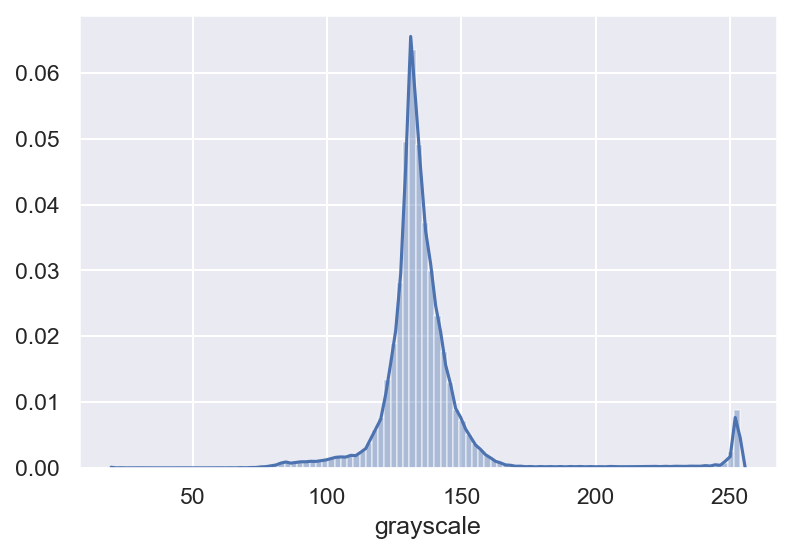

In [48]:
# Plotting a basic histogram of the grayscale values

sns.distplot(gray['grayscale'], bins=100)

We see that the grayscale data exhibits a bi-modal distribution

**Basic Summary Statistics - other feature**

**Basic Summary Statistics - other feature 2**

So, we see that most grayscale values are somewhere between 125-150, and there are a few that are around 250. The large grayscale values must be the bright lightning strikes. 

In [ ]:
sns.scatterplot(x=gray["timings"][:300], y=gray["grayscale"][:300])

Looking at the above scatter plot, we can see that there are quite a few data points that seem to be clustered together! At least when the grayscale values are on a general decline, then there is some type of equilibrium.

We will try to see if we can investigate further into the groupings by using an interactive plot.

In [ ]:
gray.head(300).iplot(kind='scatter',x="timings", y="grayscale")

Sooooo!!!!! We see that each grouping in the first scatter plot always consists of exactly three grayscale data points! (Except for the step at around 222, which is only two points)

So, perhaps a good idea is to group these triplets of datapoint into a single data point, whose grayscale value we we will define to the the average. This will GREATLY reduce the size of our dataframe, which would make it easier to analyze further.

BUT: Something that is really weird is that a lightning strike doesn't occur for more than 11 seconds after the first initial one...what's up with that?!

In [ ]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    gray[:2000]

OKAY!! So I know what the story is:

(1) I turn the program on right as a lightning strike occurs. This is why we see some grayscale values of ~250's at the head of the data.


(2) As the bright screen from the lightning started to die out, I went to the "start" menu.
    - index: 37 - 576
    - time: 18:23.48 - 18:41.4450
    - at around 130 grayscale
    - the grayscale of the start screen seems to therefore be [120,122)
        - it's pretty much ~121.45
    - I stay on the start screen for about ~18 seconds


(3) Then, I exited from the "start" menu, and went back to the game.
    - index: 578 - 603
    - time: 18:41.509266 - 18:42.487482
    - it takes a second to exit the "start" menu
        - The screen goes to black when you do this
        - Hence why the grayscale values are <<100 during this brief time
        
(4) Finally, the true data collection begins!
    - index: 604...
    - time: 18:42.531267

So, what we will do is drop all the data points with index 603 and below

In [ ]:
gray.drop(labels=range(604), axis=0, inplace=True)

In [ ]:
gray.head(20)

In [ ]:
sns.scatterplot(x=gray["timings"][:300], y=gray["grayscale"][:300])

In [ ]:
gray.head(500).iplot(kind='scatter',x="timings", y="grayscale")

Okay, now let's see if my original "group by three" idea would work

In [ ]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    gray.loc[range(653,1500), gray.columns]

To-Do:

1: Investigate the grayscale values for each lightning strike

2: Create a function to group the data (bins for milliseconds; group-by-threes; ...)

3: Connect grayscale data with the lightning count data (ffx2_cleaned)

4: Investigate the frequency of the fog?

In [ ]:
test_gray = gray["grayscale"].loc[817:824]
test_gray
np.std(test_gray.values)

In [ ]:
test_gray = gray["grayscale"].loc[700:705]
test_gray
np.std(test_gray.values)

In [ ]:
test_gray = gray["grayscale"].loc[718:723]
test_gray
np.std(test_gray.values)

In [ ]:
test_gray = gray["grayscale"].loc[748:753]
test_gray
np.std(test_gray.values)

In [ ]:
test_gray = gray["grayscale"].loc[766:771]
test_gray
np.std(test_gray.values)

In [ ]:
test_gray = gray["grayscale"].loc[787:794]
test_gray
np.std(test_gray.values)

Based on the 6 testing group above, I've decided on groupings based on the milliseconds of time:

    - [0,250000) U [250000,500000) U [500000,750000) U [750000,1000000)

The decision criteria for whether or not to group a subset of data will be based on the threshold of 1 std:
    - If std of grayscale values is <= 1, then I will average the grayscale and times to create a single data point
    - Otherwise, if std>1, I will leave the data alone and move onto the next time grouping



In [ ]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    gray.loc[range(604,1000), gray.columns]

In [ ]:
test_grayscale = gray[["grayscale", "Datetime", "deltaT", "dT(seconds)"]]
test_grayscale.head(20)

In [ ]:
test_grayscale["Datetime"][604]
pd.to_datetime(test_grayscale["Datetime"].values.astype(np.int64).mean())


# np.mean(test_grayscale["time"].loc[604:610].values)

In [ ]:
# Just some practice to see how to average date/time values

test_grayscale["grayscale"].loc[604:606].mean()
pd.to_datetime(test_grayscale["Datetime"].loc[604:606].mean())
pd.to_timedelta(test_grayscale["deltaT"].loc[604:606].mean())
test_grayscale["dT(seconds)"].loc[604:606].mean()

In [ ]:
test_grayscale["Datetime"][604].time()
test_grayscale["Datetime"][604].time().microsecond

In [ ]:
test_grayscale["grayscale"].values[0]
test_grayscale["Datetime"]

In [ ]:
def grouping(grayvalues, datetimes):
    
    grayscale_values = []
    datetime_values = []
    n=2
    threshold = 750000
    new_list = []
    new_dict = {}
#     new_df = pd.DataFrame(data=None, columns=["new_gray_value", "new_datetime"])
    
    for i in range(len(grayvalues)): # -loop over all input values -> variable will be index 604 onwards
    
#         print(datetimes[i+604].time().microsecond)
#         print(threshold)
        if ( datetimes[i+604].time().microsecond < threshold and datetimes[i+604].time().microsecond > threshold-250000):
            grayscale_values.append(grayvalues.values[i])
            datetime_values.append(datetimes[i+604])
        
        else:
            
            if len(grayscale_values) > 0:
                gray_std = np.std(grayscale_values)
            else:
                gray_std=0
                
#             print("gray_std = ", gray_std)
#             print("The grayscale_values are:", grayscale_values)
#             print("The datetime_values are:", datetime_values)
            
            if gray_std <= 1:
                grayscale_mean = np.mean(grayscale_values)
                datetime_mean = pd.to_datetime(datetime_values).mean()
                new_dict.update({"new_gray_value": grayscale_mean})
                new_dict.update({"new_datetime": datetime_mean})
                new_list.append(new_dict)
            
            else:
                for j in range(len(grayscale_values)):
                    new_dict = {}
                    new_dict.update({"new_gray_value": grayscale_values[j]})
                    new_dict.update({"new_datetime": datetime_values[j]})
                    new_list.append(new_dict)   
            
            n = (n+1) % 4
            threshold = 250000 + 250000*n
            
            grayscale_values = []
            datetime_values = []
            new_dict = {}
            
            grayscale_values.append(grayvalues.values[i])
            datetime_values.append(datetimes[i+604])
                    
    new_dict.update({"new_gray_value": grayscale_values[0]})
    new_dict.update({"new_datetime": datetime_values[0]})
    new_list.append(new_dict) 
    
    
    
#     print("The new_list is:", new_list)
    
    new_df = pd.DataFrame(data=new_list)#, columns=["new_gray_value", "new_datetime"])
    
    return new_df 
    
    

In [ ]:
x = test_grayscale["grayscale"]
y = test_grayscale["Datetime"]

len(x)
x
y
# my_list=[]
# for i in range(5):
#     my_list.append(y[i+604])
    
# pd.to_datetime(my_list).mean()

In [ ]:
i=0
y[i+604].time().microsecond

x.values[i]
y[i+604]

In [ ]:
# This takes very long to execute
boom = grouping(x, y)

In [ ]:
boom[:100]

In [ ]:
# # This takes up a lot of memory????
# with pd.option_context("display.max_rows", None, "display.max_columns", None):
#     boom.loc[range(len(boom)), boom.columns]

In [ ]:
boom[:100].iplot(kind='scatter',x="new_datetime", y="new_gray_value")

In [ ]:
np.std(boom.loc[260:270]["new_gray_value"].values)

In [ ]:
# This takes a while (b/c have to apply the anonymous function a lot)
sns.scatterplot(x=boom["new_datetime"][:300].apply(lambda x: x.strftime("%H:%M:%S.%f")), y=boom["new_gray_value"][:300])

In [ ]:
boom["new_datetime"][:300].apply(lambda x: x.strftime("%H:%M:%S.%f"))

In [ ]:
gray["Datetime"][1000].strftime("%H:%M:%S")

# Let's try investigating the lightning strikes themselves

In [ ]:
boom.describe()

In [ ]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    boom.loc[range(1500), boom.columns]

Based on just a preliminary look at this grouped data, we see that a lightning strike is initiated by a grayscale value of around 150-180, then peaks at around 251-253, then is finished by around 165-180, then goes below 100, and then goes back to the usual 120's/130's.

There are times where the grayscale data is below 100 for a long time, whereas at other lightning strikes it's only below 100 for around 4 data points. Maybe this has to do with whether or not there was fog on the screen????

In [ ]:
strike_data = boom[(boom['new_gray_value'] < 100) | (boom['new_gray_value'] > 160)]
strike_data.head()
strike_data.describe()

In [ ]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    strike_data.reset_index().loc[range(1000), strike_data.columns]

Okay!! So I think I found a new pattern: When the lightning strike starts, the grayscale values go above 200 and it's always the second one above 200 that is a maximum, and then the grayscale values decrease from there to below 100.

But, when they are below 100, there doesn't seem to be any similar pattern.

Regardless, let's try to prove this pattern is the case for all our data.

In [ ]:
# Function to check if my conjecture is correct

def max_gray(grayscale, gray_threshold):
    
    max_gray = 0
    max_index = 0
    gs_array = []
    off_count = 0
    total_count = 0
    
    for i in range(len(grayscale)):
        
        if grayscale.values[i] > gray_threshold:
            gs_array.append(grayscale.values[i])
            
        else:
            total_count += 1
            
            if not len(gs_array):
                continue
            
            max_gray = max(gs_array)
            max_index = gs_array.index(max_gray)
            
            if max_index != 1:
#                 print(f"Nope, your conjecture is false! Look at values before index {i}")
                
                off_count += 1
                
#                 return gs_array
            elif max_index == 1:
                gs_array = []
    
#     return "Your conjecture is true!"
    print(f"off_count = {off_count}")
    print(f"total_count = {total_count}")
    
    return f"The number of strikes that DONT agree with your conjecture are: {off_count / total_count}"


In [ ]:
max_gray(strike_data["new_gray_value"], 200)

Well.....shit....lol. Okay okay, so looking at the data again, I think if I increase the bolt start grayscale to 220 instead of 200, then the pattern works.

In [ ]:
max_gray(strike_data["new_gray_value"], 220)

Alright, well, let's see how many strikes don't follow my conjecture.

In [ ]:
max_gray(strike_data["new_gray_value"], 220)

Okay, fine, I was wrong okay!

In any case, we can still isolate the lightning strikes; let's try creating a function to do that for us.

In [ ]:
# Function to isolate the lightning strikes

def lightning(grayvalues2, datetimes2 = None):
    
    count = 1
    my_list = []
    list_of_gray = []
    my_dict = {}
    
    for i in range(len(grayvalues2)):
        
        if (grayvalues2.values[i] > 200):
            
            if not len(list_of_gray):
                list_of_gray.append(grayvalues2.values[i-1])
            
            list_of_gray.append(grayvalues2.values[i])
            
        else:
            
            if not len(list_of_gray):
                continue            
            
            list_of_gray.append(grayvalues2.values[i])
            
            my_dict.update({f"strike_{count}":list_of_gray})
            my_list.append(my_dict)
            
            list_of_gray = []
#             my_dict = {}
            count+=1
#     print(my_dict)                    
    new_df = pd.DataFrame(data={k:pd.Series(v) for k,v in my_dict.items()})#, columns=[])
    
    return new_df

In [ ]:
strikes = lightning(strike_data["new_gray_value"])

In [ ]:
strikes.describe()

In [ ]:
strikes.transpose().describe()

In [ ]:
strikes.head(50)

In [ ]:
strikes.iloc[1].mean()

In [ ]:
sns.heatmap(strikes.isnull(), yticklabels=True, cbar=False, cmap="viridis")

In the above heatmap, the yellow color represents a null value.

We can see that most lightning strikes admit around 9-10 grayscale values. There are about 20-30 strikes that have around 4-6 grayscale values.

We can actually compute these values exactly

In [ ]:
strike_lengths = {f'length_{i}':strikes.iloc[i].nunique() for i in range(len(strikes.index))}

In [ ]:
strike_lengths